In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def swiss_roll(n):
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
            
    data[:,0]=phi*np.cos(phi) #x coordinte
    data[:,1]=phi*np.sin(phi) #y coordinate
    data[:,2]=psi #z coordinate
    return data

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


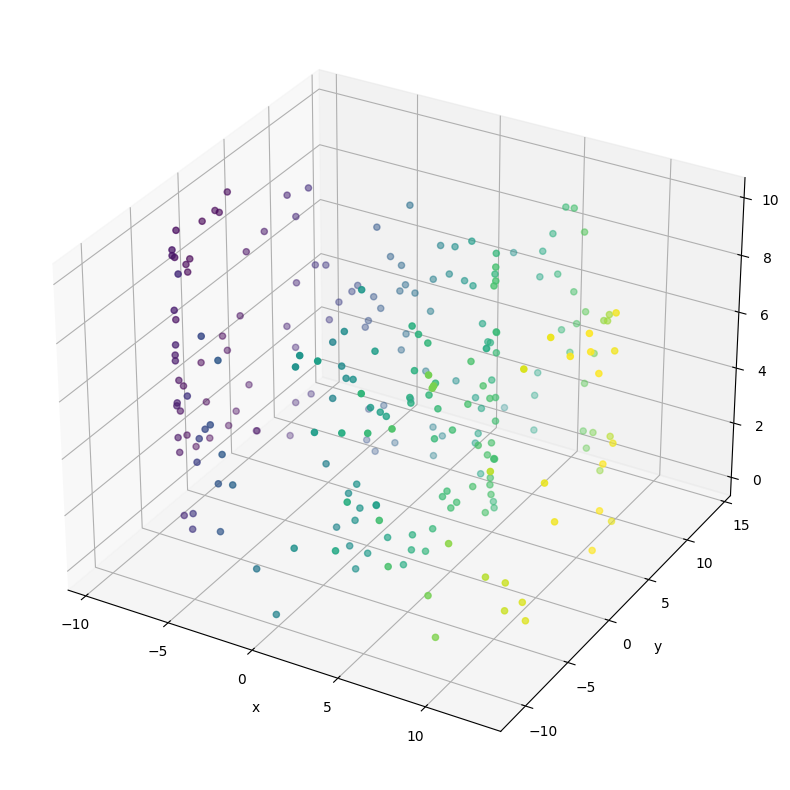

In [33]:
N = 250
X = swiss_roll(N)

plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(X[:,0], X[:,1], X[:,2], c=X[:,0])

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

#axes.view_init(45, 45) #(elevation, azimuth angle)

plt.show()

In [34]:
print(X)
print(X.shape)

[[ 3.08501121e+00 -4.34606550e+00  5.85815463e+00]
 [ 8.13884482e+00  1.07575614e+01  4.80545477e+00]
 [ 5.38187879e+00 -1.01441044e+01  7.11133126e+00]
 [ 1.03194249e+00  7.65062514e+00  7.23112117e+00]
 [ 4.48280077e+00  5.60819575e+00  5.90418665e+00]
 [ 1.25836550e+01  2.48375909e-01  8.97017824e+00]
 [-5.16336685e+00  6.75990268e+00  5.44109722e+00]
 [ 1.57466976e+00 -1.10255554e+01  2.70526302e+00]
 [ 6.02978172e-01 -4.79963642e+00  7.95553268e+00]
 [ 3.36188073e+00 -4.20847635e+00  5.72398367e+00]
 [ 1.08136847e+01 -5.43109084e+00  1.61515042e+00]
 [-2.94473144e+00 -1.03047333e+01  4.94007933e+00]
 [-7.05004837e+00  5.24215874e+00  3.87800066e+00]
 [ 1.02789134e+01 -6.23331991e+00  5.61821694e+00]
 [ 5.94870953e+00 -1.24302695e+00  2.35245408e+00]
 [-3.84491266e+00  7.39353574e+00  4.57206208e-01]
 [ 5.40748337e+00  4.38995605e+00  4.62246639e-01]
 [ 5.29889619e+00 -2.47120661e+00  6.74329070e+00]
 [ 5.97302008e+00  3.19652039e+00  2.67083829e+00]
 [ 6.22991596e+00  2.27999411e+

In [35]:
from scipy.spatial.distance import pdist, squareform

sq_dists = pdist(X, "sqeuclidean")
print(sq_dists)
print(sq_dists.shape)

# Convert pairwise distances into a square distances-matrix
mat_sq_dists = squareform(sq_dists)
print(mat_sq_dists)
print(mat_sq_dists.shape)

[254.76895571  40.46330693 150.02071451 ... 461.63097163 423.85484978
  57.47837174]
(31125,)
[[  0.         254.76895571  40.46330693 ... 208.2771225   51.14068727
   79.94572789]
 [254.76895571   0.         449.79755817 ... 244.15423799 384.28446259
  209.19922546]
 [ 40.46330693 449.79755817   0.         ... 419.86177301  13.38615864
   96.12780373]
 ...
 [208.2771225  244.15423799 419.86177301 ...   0.         461.63097163
  423.85484978]
 [ 51.14068727 384.28446259  13.38615864 ... 461.63097163   0.
   57.47837174]
 [ 79.94572789 209.19922546  96.12780373 ... 423.85484978  57.47837174
    0.        ]]
(250, 250)


In [36]:
from math import inf

def isomap(X):
    # threshold (circle)

    sq_dists = pdist(X, "sqeuclidean")

    Z = squareform(sq_dists)
    print("Z",Z)

    n_nodes = Z.shape[0]

    t = 200 # threshold

    for i in range(n_nodes):
        for j in range(n_nodes):
            if i != j:
                if Z[i][j] > t:
                    Z[i][j] = inf

    """
    for i in range(n_nodes):
        for j in range(n_nodes):
            if i != j and Z[i][j]== 0:
                Z[i][j] = inf
    """

    for k in range(n_nodes):
        for i in range(n_nodes):
            for j in range(n_nodes):
                if Z[i][j]>Z[i][k] +Z[k][j]:
                    Z[i][j] = Z[i][k] + Z[k][j]

    with open('outfile.txt','wb') as f:
        for line in Z:
            np.savetxt(f, line, fmt='%.2f')

    return Z

D = isomap(X)

Z [[  0.         254.76895571  40.46330693 ... 208.2771225   51.14068727
   79.94572789]
 [254.76895571   0.         449.79755817 ... 244.15423799 384.28446259
  209.19922546]
 [ 40.46330693 449.79755817   0.         ... 419.86177301  13.38615864
   96.12780373]
 ...
 [208.2771225  244.15423799 419.86177301 ...   0.         461.63097163
  423.85484978]
 [ 51.14068727 384.28446259  13.38615864 ... 461.63097163   0.
   57.47837174]
 [ 79.94572789 209.19922546  96.12780373 ... 423.85484978  57.47837174
    0.        ]]


In [37]:
N = X.shape[0]
G = np.empty([N,N])

D_sq = D**2
for i in range(N):
    for l in range(N):
        for k in range(N):
            sum_l = 0
            sum_i = 0
            sum_i += (D[i][k])**2
            sum_l += (D[k][l])**2
        G[i][l] = (1/2) * ((1/N) * (sum_i + sum_l) - 1/(N**2) * (np.sum(D_sq)) - (D[i][l])**2)


False
[[-6.99363569e-04 -1.22169186e-01]
 [ 1.98018790e-02 -9.59306902e-04]
 [ 1.01057557e-01 -6.39753792e-02]
 [-5.97686620e-02 -5.13239731e-02]
 [-5.33270288e-02  2.76110901e-02]
 [-1.14183658e-02 -3.63645796e-02]
 [-5.51242927e-02 -2.29592063e-04]
 [-2.82702252e-02 -4.87155337e-02]
 [-1.77168595e-02  3.24582121e-02]
 [ 1.19122640e-02  1.14698886e-03]
 [ 2.84748752e-02  2.52951227e-03]
 [-4.68765777e-02 -1.34716472e-02]
 [-3.51194345e-03 -1.56948740e-02]
 [-1.98170395e-02 -6.86132601e-02]
 [-2.86217915e-02  1.21552084e-02]
 [-2.45960989e-02 -9.44627339e-02]
 [-5.50315542e-02  1.47363538e-01]
 [ 5.98573947e-03 -1.14837850e-01]
 [-4.23938986e-02 -7.13860686e-02]
 [-9.23137018e-03 -7.35878985e-02]
 [ 9.93702145e-02 -2.35892872e-02]
 [-2.57510576e-02 -4.50195137e-02]
 [ 8.32533725e-02 -6.91050266e-02]
 [-2.46048924e-03 -1.23758625e-01]
 [-7.39176293e-02  1.53147642e-03]
 [ 2.00609403e-02 -2.80488568e-02]
 [-7.23478285e-03 -1.88333657e-02]
 [ 1.10262957e-01  1.36403327e-03]
 [ 3.92308959e

/var/folders/m2/r059lv3n7nq9x6gh78v25xk80000gn/T/ipykernel_19131/853705867.py:9: RuntimeWarning: invalid value encountered in sqrt
  ddiag = np.sqrt(np.diag(eig_vals[:2]))


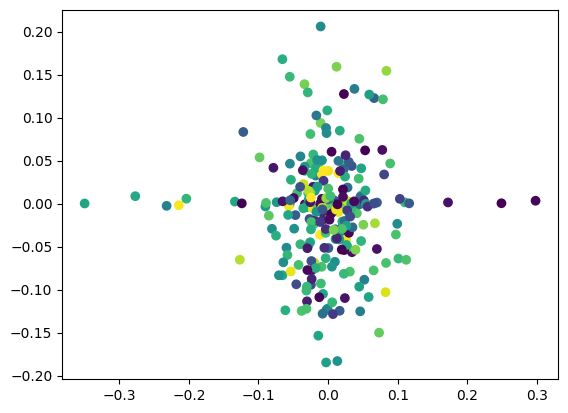

In [38]:
#skip
eig_vals, eig_vecs = np.linalg.eig(G)
print(np.all(np.linalg.eigvals(G) > 0))

sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eigvecs = eig_vecs[:,sorted_indices]

top_2_eigvecs = sorted_eigvecs[:2].T
ddiag = np.sqrt(np.diag(eig_vals[:2]))

pp = top_2_eigvecs.dot(ddiag)



print(top_2_eigvecs)
first_comp = [top_2_eigvecs[i][0] for i in range(X.shape[0])]
second_comp = [top_2_eigvecs[i][1] for i in range(X.shape[0])]
plt.scatter(first_comp, second_comp, c=X[:,0])

In [17]:
J = np.eye(N)- 1/N * np.dot(np.ones(N),np.ones(N).T)
Gdelta = -1/2 * (J.dot(D)).dot(J)

eigval, eigvec = np.linalg.eig(Gdelta)

eigval[eigval<0] =0

sortedindices = np.argsort(eigval)[::-1]
sortedeigvecs = eigvec[:,sortedindices]

proj = sortedeigvecs[:2,]


first_comp = [proj[0][i] for i in range(N)]
second_comp = [proj[1][i] for i in range(N)]

plt.scatter(first_comp, second_comp, c =  X[:,0] )



LinAlgError: Array must not contain infs or NaNs

In [11]:
x = eigvec.T.dot(np.diag(np.sqrt(eigval)))

x.shape

(500, 500)